# HW1 - Classification models in sklearn

## The Raw Data

The data is the the KC housing data.

Kaggle source: https://www.kaggle.com/harlfoxem/housesalesprediction

Basic data dictionary

https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/

Link to discussion item meaning of CONDITION and GRADE fields:

https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/141767





## Preliminary Data Prep
`price_gt_1M` is the binary target variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data for this classification problem can be found in `./data/kc_house_data_classification.csv`.

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables.

### Task 1 - Folder structure

Created a new project folder structure (housesalesprediction) with the `cookiecutter-datascience-simple` template.

### Task 2 - Version control

The project folder is under version control using git.

### Task 3 - EDA

> The housing data from the kc_house_data_classification.csv file is imported using the read_csv pandas function and is explored further by analyzing the data types of the columns and missing values if any.


In [241]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import sweetviz
import seaborn as sns
import matplotlib.pyplot as plt

In [242]:
#Importing the housing data from kc_house_data_classification.csv
housing_df = pd.read_csv('./data/kc_house_data_classification.csv')

In [243]:
housing_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [244]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [245]:
#Check for any missing values
housing_df.isnull().values.any()

False

#### Exploring the target variable price_gt_1M

In [246]:
housing_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

In [247]:
housing_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

From the given data, we can observe that around 93% of the houses have price less than one million. Ans only 6% of houses are above 1 million.

#### Automated EDA
> Using sweetviz, we can explore the variables present in the data and understand the relations between them if any.

In [248]:
report = sweetviz.analyze(housing_df)

                                             |                                                                …

In [249]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [250]:
all_cols = housing_df.columns.tolist()

#### Categorical Column Identification
Even though all the variables are numeric, we can differentiate the categorical and numerical variables depending on the values and how it is used in this dataframe.

For example, the bedrooms refer to the category of different type of bedrooms like 1 bedroom house, 2 bedroom house etc.

In [251]:
#categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']
categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',\
                  'yr_built','yr_renovated']
#categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [252]:
#All the categorical variables are converted to type category
for col in categorical_cols:
    housing_df[col] = housing_df[col].astype('category')

In [253]:
housing_df.loc[:, categorical_cols].describe()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,yr_built,yr_renovated
count,21613,21613.0,21613.0,21613,21613,21613,21613,21613,21613,21613
unique,13,30.0,6.0,2,5,5,12,70,116,70
top,3,2.5,1.0,0,0,3,7,98103,2014,0
freq,9824,5380.0,10680.0,21450,19489,14031,8981,602,559,20699


From the above descriptive statistics, we can observe that the variables like floors, waterfront, view, condition does not have too many levels. Whereas other variables like zipcode, yr_built and yr_renovated has higher number of distinct variables.

In [254]:
numeric_cols = housing_df.select_dtypes(include=['number']).columns.tolist()

In [255]:
numeric_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

#### Assertion to check if all the columns are divided into categorical_cols and numeric_cols

In [256]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols), 'each col should either be in categorical or numeric lists'

#### Count Plot, Violin Plots and Histogram

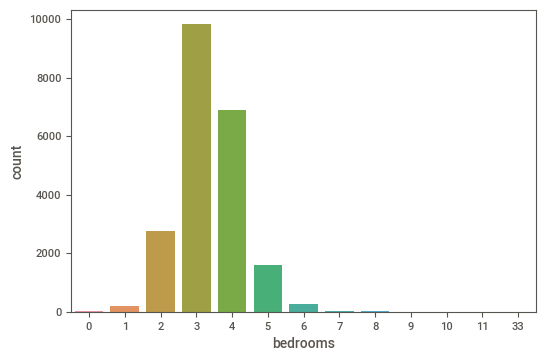

In [257]:
sns.countplot(x='bedrooms', data = housing_df);

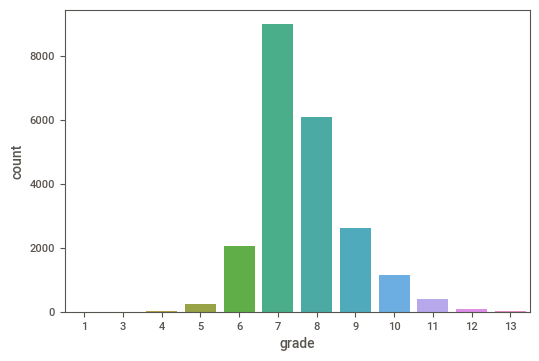

In [258]:
sns.countplot(x='grade', data = housing_df);

From the above count plots, it is clear that the most common no of bedrooms are three and four; Most popular grade is 7.

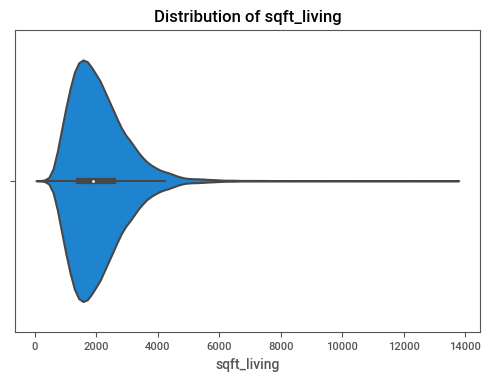

In [259]:
sns.violinplot(x='sqft_living', data = housing_df)
plt.title('Distribution of sqft_living');

Most of the observations lie between the 1000 and 3000 sqft range. Also, there are few outliers in the sqft_living.

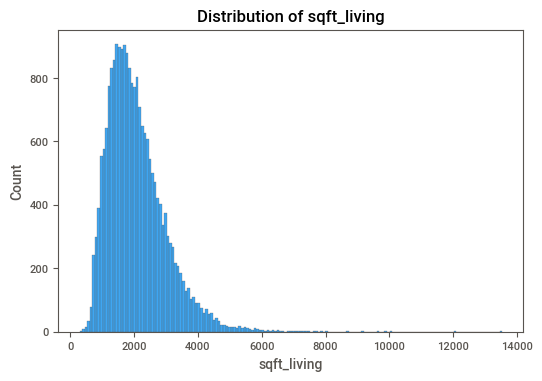

In [260]:
sns.histplot(x='sqft_living', data = housing_df)
plt.title('Distribution of sqft_living');

The sqft_living seems to be normally distributed with few outliers at the right.

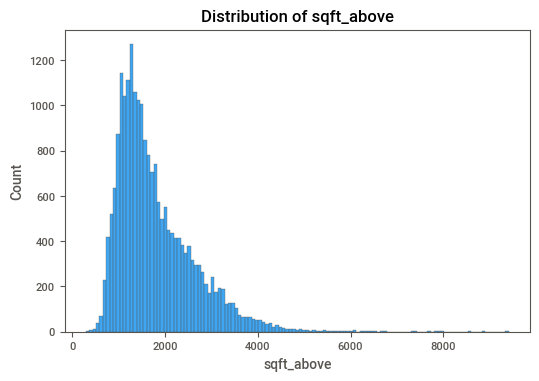

In [261]:
sns.histplot(x='sqft_above', data = housing_df)
plt.title('Distribution of sqft_above');

From the above histogram, we can see the sqft_above being slightly skewed toward the right.

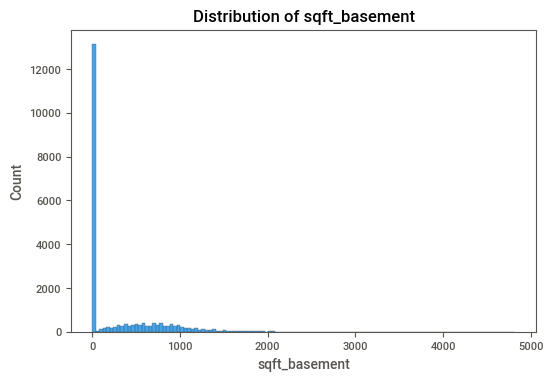

In [262]:
sns.histplot(x='sqft_basement', data = housing_df)
plt.title('Distribution of sqft_basement');

Most of the houses does not seem to have any basement.

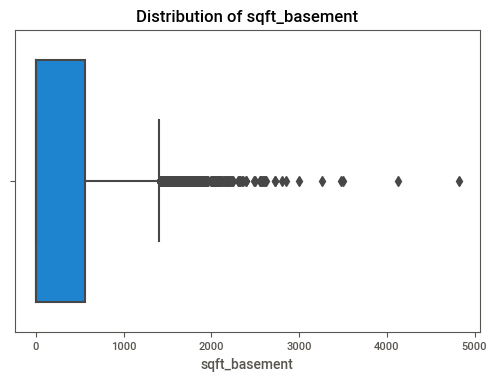

In [263]:
sns.boxplot(x='sqft_basement', data = housing_df)
plt.title('Distribution of sqft_basement');

### Task 4 - Categorize feature types

In [264]:
categorical_cols_idx = [housing_df.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[0, 1, 4, 5, 6, 7, 8, 13, 11, 12]

In [265]:
numeric_cols_idx =[housing_df.columns.get_loc(n) for n in numeric_cols]
numeric_cols_idx

[2, 3, 9, 10, 14, 15, 16, 17, 18]

In [266]:
housing_df.iloc[:, categorical_cols_idx].nunique()

bedrooms         13
bathrooms        30
floors            6
waterfront        2
view              5
condition         5
grade            12
zipcode          70
yr_built        116
yr_renovated     70
dtype: int64

#### Separating X and y for the model building

In [267]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [268]:
print(X.shape)
X.head()


(21613, 18)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [269]:
print(y.shape)
y.head()

(21613,)


0    0
1    0
2    0
3    0
4    0
Name: price_gt_1M, dtype: int64

In [270]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [271]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

In [272]:
#Since the target variable is automatically encoded, it is removed from the numeric_cols_to_keep list
numeric_cols_to_keep = np.delete(numeric_cols,  numeric_cols.index('price_gt_1M'))

In [273]:
numeric_cols_to_keep

array(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype='<U13')

### Task 4 - Logistic regression models

Build a few different logistic regression models using all of the variables in our housing dataset. For each of these models you will:

- Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling (we did this in the Pump it Up project)
- I'll be giving you different specifications and hyperparameter parameter settings to try
- You'll be scoring the models on overall accuracy for both the training and test data. Discuss any evidence of overfitting or underfitting as well as how the model does in comparison to the null model.
- There will be some additional tasks/questions for each model


#### Data Preprocessing

In [274]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_to_keep),
        ('cat', categorical_transformer, categorical_cols)])

#### Model 0: The null model

In order to set up baseline values for train and test accuracy scores, the below null model is built.

In [275]:
y_null_train = np.zeros((y_train.size), dtype=int)
y_null_test = np.zeros((y_test.size), dtype=int)

In [276]:
print(f"Training score for the null model: {np.sum(np.equal(y_train, y_null_train)) / len(y_train):.3f}")
print(f"Test score for the null model: {np.sum(np.equal(y_test, y_null_test)) / len(y_test):.3f}")

Training score for the null model: 0.933
Test score for the null model: 0.924


In [277]:
#Null model scores using sklearn
from sklearn.metrics import accuracy_score
y_null_train = np.zeros((y_train.size), dtype=int)
accuracy_score(y_train, y_null_train)

0.9327356853672644

In [278]:
from sklearn.metrics import accuracy_score
y_null_test = np.zeros((y_test.size), dtype=int)
accuracy_score(y_test, y_null_test)

0.9238954429794124

In [279]:
print(f"Training score for the null model: {accuracy_score(y_train, y_null_train):.3f}")
print(f"Test score for the null model: {accuracy_score(y_test, y_null_test):.3f}")

Training score for the null model: 0.933
Test score for the null model: 0.924


#### Model 1: Ridge regression with C=1.0

In [280]:
# Classifier model
clf_model1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

# full prediction pipeline.
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model1)])

# Fit model on training data
clf1.fit(X_train, y_train)

print(f"Training score: {clf1.score(X_train, y_train):.3f}")
print(f"Test score: {clf1.score(X_test, y_test):.3f}")

Training score: 0.977
Test score: 0.970


In [281]:
from sklearn import set_config

set_config(display='diagram')
clf1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype='<U13')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'zipcode', 'yr_built',
                                                   'yr_renovated'])])),
                ('classifier',
                 LogisticRegression(max_iter=2000, solver='saga'))])

In [282]:
clf1.named_steps['classifier'].coef_.shape

(1, 334)

##### coef_plot

In [283]:
def coef_plot(model, title=None):
    plt.plot(model.steps[1][1].coef_[0])
       
    if title:
        plt.title(title)

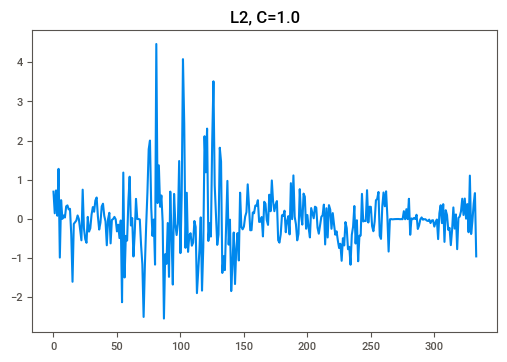

In [284]:
coef_plot(clf1, 'L2, C=1.0')

##### Confusion Matrix

In [285]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16013   114]
 [  285   878]]
Normalized confusion matrix for train
[[0.99293111 0.00706889]
 [0.24505589 0.75494411]]


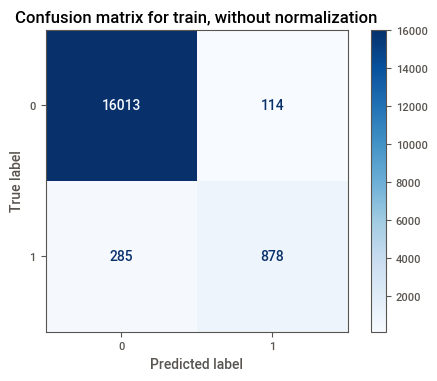

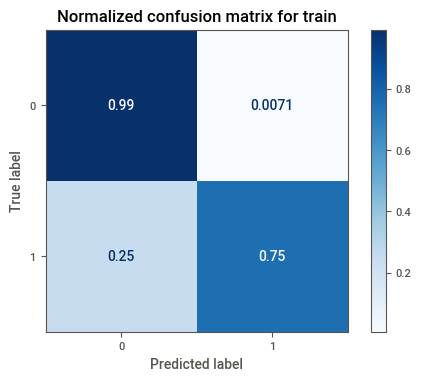

In [286]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3960   34]
 [  97  232]]
Normalized confusion matrix for test
[[0.99148723 0.00851277]
 [0.29483283 0.70516717]]


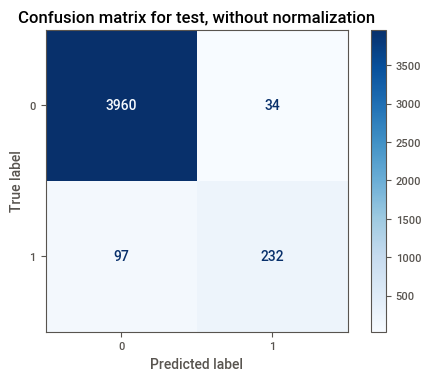

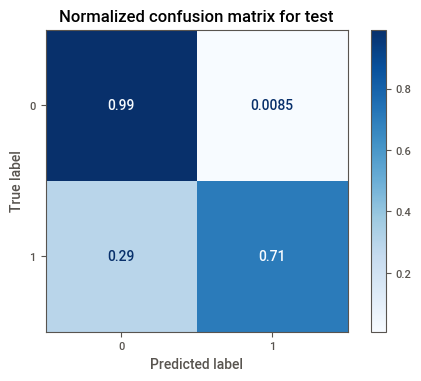

In [287]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 2: Lasso regression with C=1.0

In [288]:
# Classifier model
clf_model2 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# full prediction pipeline.
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model2)])

# Fit model on training data
clf2.fit(X_train, y_train)

print(f"Training score: {clf2.score(X_train, y_train):.3f}")
print(f"Test score: {clf2.score(X_test, y_test):.3f}")

Training score: 0.978
Test score: 0.971


> The test and test scores of this Lasso regression model is slightly higher than the ridge regression model.

##### coef_plot

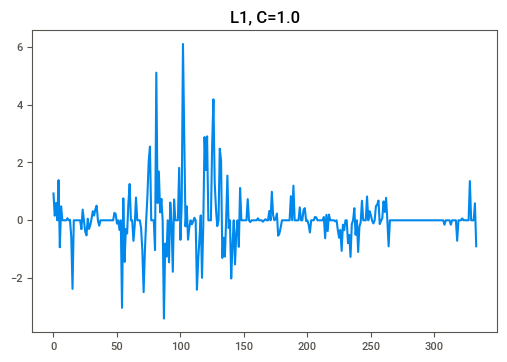

In [289]:
coef_plot(clf2, 'L1, C=1.0')

##### Confusion Matrix

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16011   116]
 [  270   893]]
Normalized confusion matrix for train
[[0.99280709 0.00719291]
 [0.23215821 0.76784179]]


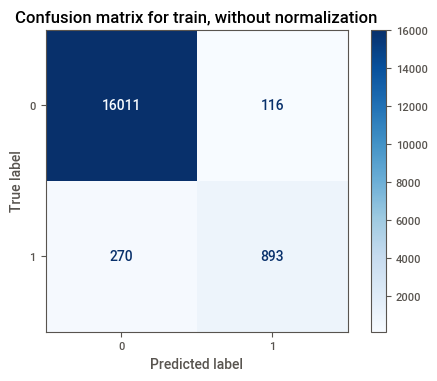

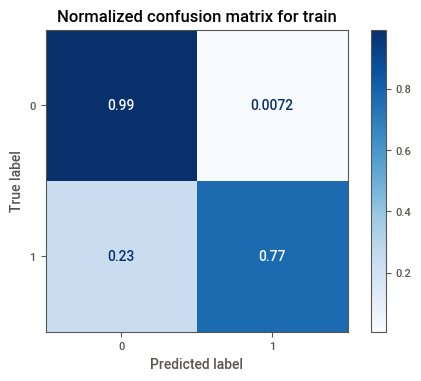

In [290]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf2['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf2, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3962   32]
 [  93  236]]
Normalized confusion matrix for test
[[0.99198798 0.00801202]
 [0.28267477 0.71732523]]


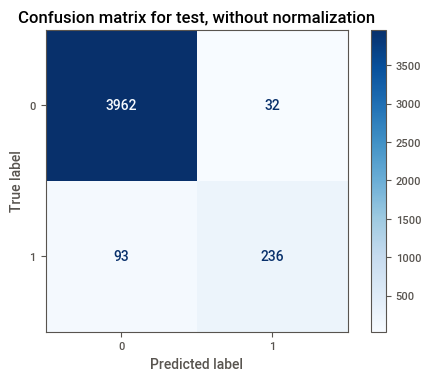

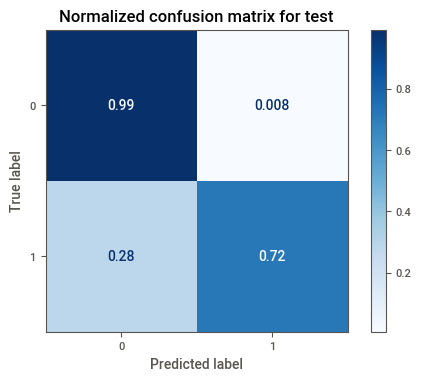

In [291]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf2['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 3: Lasso regression with C=0.01

> The C value of 0.01 indicates high regularization. 

In [292]:
# Classifier model
clf_model3 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# a full prediction pipeline.
clf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model3)])

# Fit model on training data
clf3.fit(X_train, y_train)

print(f"Training score: {clf3.score(X_train, y_train):.3f}")
print(f"Test score: {clf3.score(X_test, y_test):.3f}")

Training score: 0.953
Test score: 0.948


C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


##### coef_plot

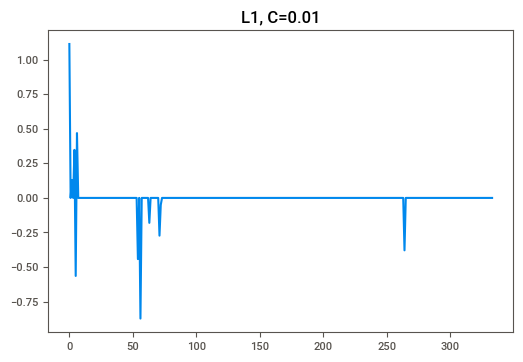

In [293]:
coef_plot(clf3, 'L1, C=0.01')

> This model has lower training and test accuracy when compared to the previous models.
Also, from the coef plot we can see most of the coefficients being shrinked to zero indicating high dimensionality reduction due to regularization.

##### Confusion Matrix

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16004   123]
 [  685   478]]
Normalized confusion matrix for train
[[0.99237304 0.00762696]
 [0.58899398 0.41100602]]


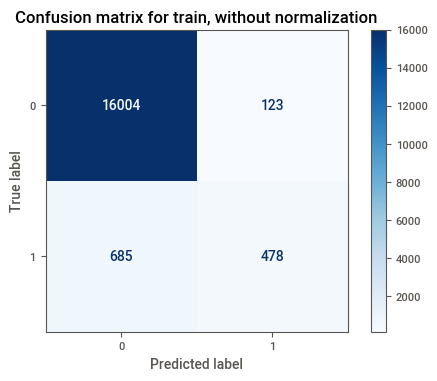

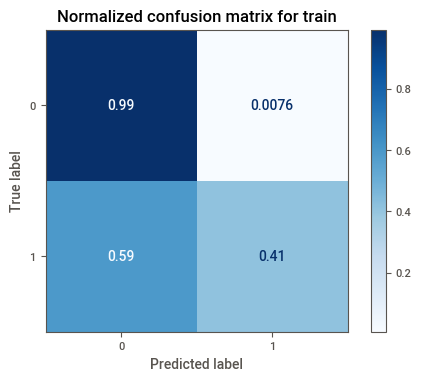

In [294]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf3['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3964   30]
 [ 193  136]]
Normalized confusion matrix for test
[[0.99248873 0.00751127]
 [0.58662614 0.41337386]]


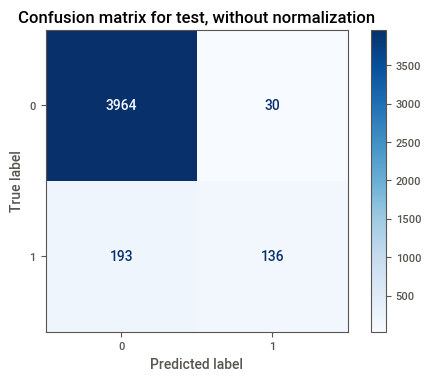

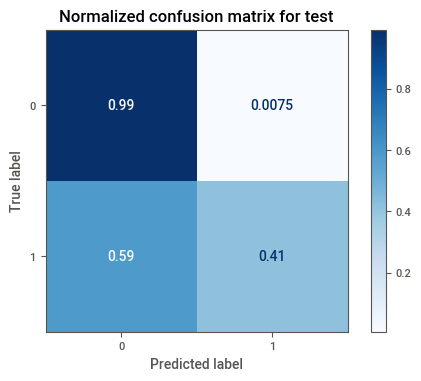

In [295]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf3['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#### Model 4: Lasso regression with optimal C value

In [296]:
# Classifier model
clf_model4 = LogisticRegressionCV(penalty='l1', solver='liblinear', Cs = [10, 1, 0.1, 5], max_iter=2000)

# full prediction pipeline.
clf4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model4)])

# Fit model on training data
clf4.fit(X_train, y_train)

print(f"Training score: {clf4.score(X_train, y_train):.3f}")
print(f"Test score: {clf4.score(X_test, y_test):.3f}")

Training score: 0.977
Test score: 0.971


In [297]:
#Cost Value
clf4.named_steps['classifier'].C_

array([1.])

In [298]:
print(f"Model scores: {clf4.named_steps['classifier'].scores_:}")
print(f"Optimal C value: {clf4.named_steps['classifier'].C_:}")

Model scores: {1: array([[0.97108155, 0.97310584, 0.96674378, 0.97137073],
       [0.96992481, 0.97108155, 0.96616541, 0.96876807],
       [0.97281666, 0.97310584, 0.96703297, 0.97252747],
       [0.97484095, 0.97455176, 0.9664546 , 0.97541932],
       [0.96992481, 0.97223829, 0.96876807, 0.97108155]])}
Optimal C value: [1.]


> The optimal cost value observed is 1. In this case, the regularization does not provide much help.

##### coef_plot

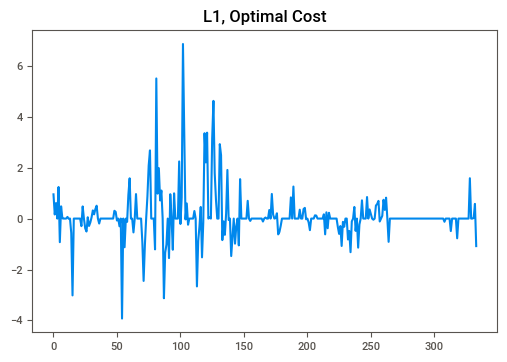

In [299]:
coef_plot(clf4, 'L1, Optimal Cost')

##### Confusion Matrix

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16005   122]
 [  275   888]]
Normalized confusion matrix for train
[[0.99243505 0.00756495]
 [0.23645744 0.76354256]]


C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


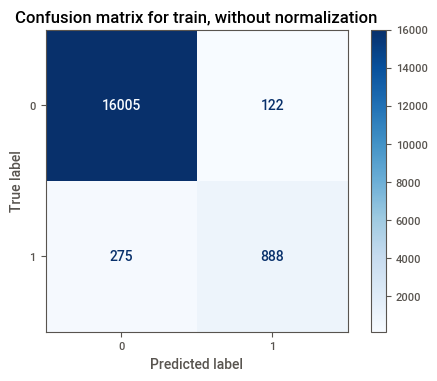

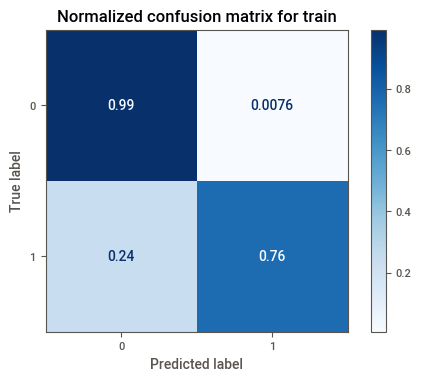

In [300]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf4['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3961   33]
 [  94  235]]
Normalized confusion matrix for test
[[0.99173761 0.00826239]
 [0.28571429 0.71428571]]


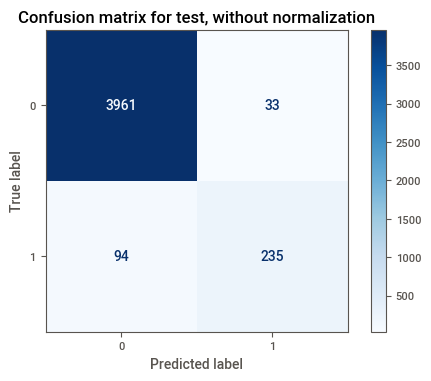

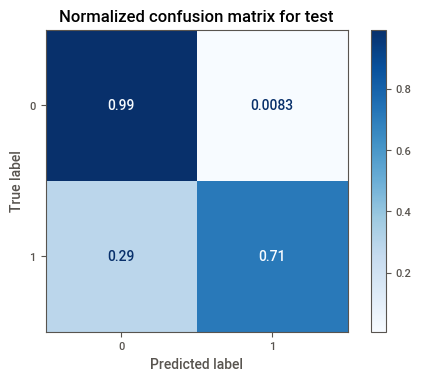

In [301]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf4['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Task 5 - Random forest model

In [302]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
# Append random forest classifier to preprocessing pipeline.
clf5 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

clf5.fit(X_train, y_train)

print(f"Training score: {clf5.score(X_train, y_train):.3f}")
print(f"Test score: {clf5.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.969


> The Random Forest models do not have any coefficients and in this case we have got a perfect training score but a slightly lower test scores when compared to previous models. This might indicate a slight overfitting of training data. 

> All the different models have higher training and test scores than the null model.

##### Confusion Matrix

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16127     0]
 [    0  1163]]


C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix for train
[[1. 0.]
 [0. 1.]]


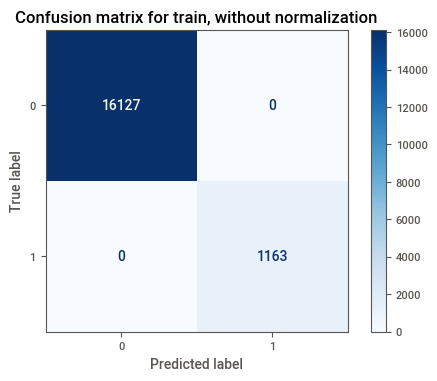

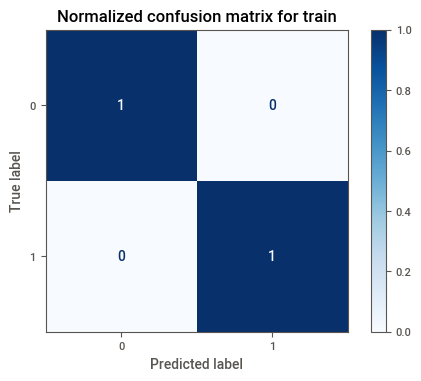

In [304]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf5['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf5, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3965   29]
 [ 106  223]]
Normalized confusion matrix for test
[[0.99273911 0.00726089]
 [0.32218845 0.67781155]]


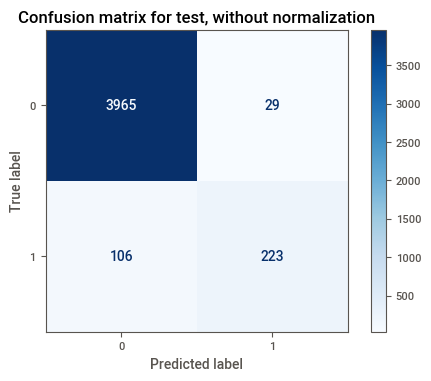

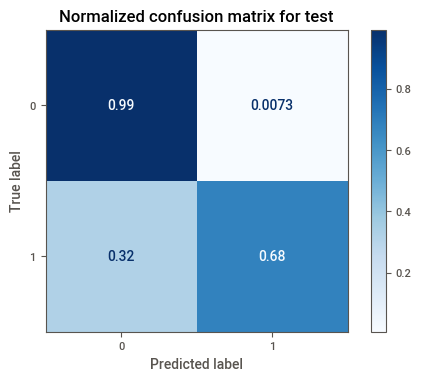

In [305]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf5['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf5, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Task 6 - a little error exploration


* `price` is not in our original data but is in the `kc_house_data_regression.csv` dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
* We partitioned the classification dataset into training and test datasets.
* In order to create the histogram, we simply need a Series (or array) of `price` values corresponding to the predictions in test that we got wrong.

In [306]:
#Read the kc_house_data_regression.csv file
housing_reg_df = pd.read_csv('./data/kc_house_data_regression.csv')

In [307]:
housing_reg_df.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,510000.0


In [308]:
# Regression model
reg_model = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# full prediction pipeline.
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('reg', reg_model)])

# Fit model on training data
reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype='<U13')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'zipcode', 'yr_built',
                                                   'yr_renovated'])])),
                ('reg',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [309]:
print(f"Training score: {reg.score(X_train,y_train):.3f}")
print(f"Test score: {reg.score(X_test,y_test):.3f}")

Training score: 0.978
Test score: 0.971


In [310]:
#predictions on the test data
y_pred = reg.predict(X_test)     

In [311]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [312]:
#Combining y_test and y_pred to a single dataframe
pred_compare = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, columns=['y_test', 'y_pred'])                        

In [313]:
pred_compare

,y_test,y_pred
13473,0,0
9626,0,0
21376,0,0
9036,0,0
1007,0,0
...,...,...
662,0,0
16297,0,0
1390,0,0
3546,0,0


In [314]:
#retrieve the incorrect predictions
incorrect_predictions = pred_compare.loc[pred_compare['y_test']!= pred_compare['y_pred']]

In [315]:
incorrect_predictions

,y_test,y_pred
4937,1,0
16888,0,1
12591,1,0
11947,1,0
11421,1,0
...,...,...
9945,1,0
1807,0,1
8539,1,0
4892,0,1


In [316]:
#Merge the price value of incorrect predictions
incorrect_predictions['price'] = housing_reg_df['price'].loc[incorrect_predictions.index]

C:\Users\mbala\anaconda3\envs\aap\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [317]:
incorrect_predictions['price']

4937     1400000.0
16888     995000.0
12591    1075000.0
11947    1150000.0
11421    1017000.0
           ...    
9945     1150000.0
1807      930000.0
8539     1208000.0
4892      952000.0
21179    1050000.0
Name: price, Length: 125, dtype: float64

In [318]:
print(max(incorrect_predictions['price']))

1655000.0


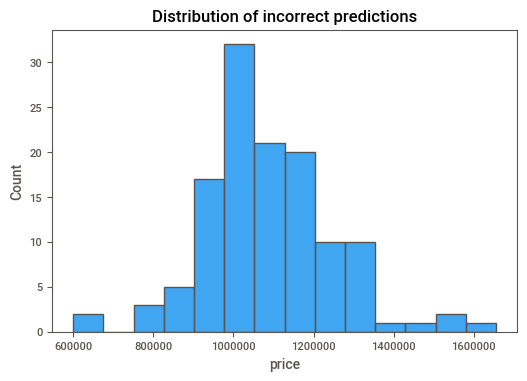

In [319]:
#Histogram of incorrect predicitons
sns.histplot(x='price', data = incorrect_predictions)
plt.title('Distribution of incorrect predictions');

> From the above histogram, we can see higher number of incorrect predictions from 0.9 million to 1.2 million

## Optional Hacker Extra Credit tasks

* Try out the [Histogram based Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html?highlight=histogram%20based%20gradient%20boosting%20classifier) shown in the optional materials at the end of Module 2. Compare its performance to logistic regression and the random forest.
* I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Use sklearn's `LassoCV` to find a good regression model for predicting `price`.

#### Histogram based Gradient Boosting Classifier

In [320]:
# Import the gradient boosting module and encoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

target_col = ['price_gt_1M']

In [321]:
numeric_cols

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [322]:
X_test.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
9626,3,1.00,980,9682,1.0,0,0,3,7,980,0,1969,0,98031,47.4136,-122.207,1580,9682
21376,3,2.25,1310,915,2.0,0,0,3,7,1060,250,2007,0,98144,47.5738,-122.293,1500,1215
9036,3,2.75,2216,31215,1.0,0,0,3,9,2216,0,1968,2005,98092,47.3164,-122.199,2216,30048
1007,4,2.50,2610,7091,2.0,0,0,3,9,2610,0,1987,0,98023,47.3017,-122.349,2610,7773


In [323]:
numeric_transformer_hgbc = StandardScaler()
categorical_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
target_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

preprocessor_hgbc = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_hgbc, categorical_cols),
        ('num', numeric_transformer_hgbc, numeric_cols_to_keep)],
        remainder='passthrough')

categorical_cols_idx = [_ for _ in range(len(categorical_cols))]

# Append classifier to preprocessing pipeline.
clf_hgbc = Pipeline(steps=[('preprocessor', preprocessor_hgbc),
                      ('classifier', HistGradientBoostingClassifier(categorical_features=categorical_cols_idx))])

# Fit model
clf_hgbc.fit(X_train, y_train)
print(f"hgbc training score: {clf_hgbc.score(X_train, y_train):.3f}")
print(f"hgbc test score: {clf_hgbc.score(X_test, y_test):.3f}")
clf_hgbc_test = clf_hgbc.predict(X_test)


hgbc training score: 0.996
hgbc test score: 0.968


> The Histogram based Gradient Boosting Classifier model outperforms the logistic regression and random forest model as it has high accuracy for both training and test datasets.

#### LassoCV

In [324]:
X_reg = housing_reg_df.iloc[:, 0:17]
y_reg = housing_reg_df.iloc[:, 17]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=73)

In [325]:
X_train_reg

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
13067,3,2.25,1670,7881,1.0,0,0,4,7,1190,480,1977,0,98031,47.4105,-122.180,1870
17417,5,2.75,3100,5298,2.0,0,0,3,7,3100,0,2007,0,98065,47.5369,-121.887,2440
1290,3,2.25,2470,10290,2.0,0,0,3,8,2230,240,1984,0,98058,47.4459,-122.124,1970
13137,3,1.75,2610,117176,1.0,0,0,3,7,1390,1220,1981,0,98022,47.2585,-121.925,2140
15815,3,1.75,1400,18002,1.0,0,0,3,6,1400,0,1977,0,98019,47.7250,-121.967,2240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13704,3,1.75,2200,7200,1.0,0,0,3,8,1270,930,1962,0,98032,47.3745,-122.276,1800
16144,4,2.50,2980,5896,2.0,0,0,3,8,2980,0,2001,0,98053,47.6872,-122.036,2900
8586,3,2.00,2420,17859,1.0,0,1,5,9,1500,920,1979,0,98034,47.7074,-122.246,2955
4014,3,1.75,2160,6272,1.0,0,0,4,8,1390,770,1960,0,98115,47.6777,-122.306,1290


In [326]:
y_reg

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [327]:
categorical_cols

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'zipcode',
 'yr_built',
 'yr_renovated']

In [328]:
#Dropping sqft_lot15 as it is not available in regession csv file
numeric_cols_reg = np.delete(numeric_cols_to_keep,  np.where(numeric_cols_to_keep =='sqft_lot15'))

In [329]:
numeric_cols_reg

array(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat',
       'long', 'sqft_living15'], dtype='<U13')

In [330]:
# Create transformer objects
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers into a preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_reg),
        ('cat', categorical_transformer, categorical_cols)])

In [331]:
from sklearn.linear_model import LassoCV

model_lasso_cv = LassoCV(cv=7, random_state=0)

lasso_cv = Pipeline(steps=[('preprocessor', preprocessor),
                      ('lasso_cv', model_lasso_cv)])

lasso_cv.fit(X_train_reg, y_train_reg)


print(f"Training score: {lasso_cv.score(X_train_reg,y_train_reg):.3f}")
print(f"Test score: {lasso_cv.score(X_test_reg,y_test_reg):.3f}")

y_pred = lasso_cv.predict(X_test_reg)

Training score: 0.834
Test score: 0.814


## Deliverables
You should simply compress your entire project folder as either a zip file or a tar.gz file (do **NOT** ever use WinRAR to create rar files in this class). Note that when you do this, your "hidden" `.git` folder will get included. So, I'll be able to tell that you put the project under version control and I'll be able to look at your project folder structure. Before compressing the project folder to submit it:

* make sure all of your notebooks and other files are in the main project folder and have good filenames,
* make sure you've committed all of your changes (git),
* upload your compressed folder in Moodle.